In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import time, datetime
pd.set_option('display.max_rows', 101)
!date

Mon Feb 24 13:26:30 PST 2020


# Aggregate and plot outputs of Minimal minority-majority sim

launch code at /ihme/code/beatrixh/microsim_2020/census_2020/launch_majority_minority_jobs.py \
sim code at /ihme/code/beatrixh/microsim_2020/census_2020/launch_majority_minority_jobs.py

In [ ]:
def summarize_dir(path):
    """
    Parameter: input dir containing csvs
    ---------
    Output: 1-column df containing the row means of the concatenated csvs
    """
    files = os.listdir(path)
    output = pd.DataFrame(np.zeros([11,1]))
    for file in files:
        df = pd.read_csv(path + '/' + file, index_col=False)
        df = df.iloc[:,1:]
        output = pd.concat([output,df], axis=1, ignore_index=True)
    return output.mean(axis=1)

In [ ]:
# get dt with one col per sim setting
dirs = os.listdir('/ihme/scratch/users/beatrixh/2020-02-21-strat-total-pop')
# dirs = ['/ihme/scratch/users/beatrixh/2020-02-21-strat-total-pop/' + i for i in dirs]
dirs
# dt = pd.DataFrame()
# for path in dirs:
#     new = summarize_dir(path)
#     dt = pd.concat([dt, new], axis = 1, ignore_index=True)
# print(dt.T)

In [51]:
#
outer_dirs = os.listdir('/ihme/scratch/users/beatrixh/2020-02-24_run1/')
dirs = ['/ihme/scratch/users/beatrixh/2020-02-24_run1/' + i for i in outer_dirs]

weighted_dirs = [dir for dir in dirs if len(dir)>94] 
weighted_dirs = [i + '/' + str(os.listdir(i)[0]) for i in weighted_dirs] 

std_dirs = [dir for dir in dirs if len(dir)<=94]
std_dirs = [i + '/' + str(os.listdir(i)[0]) for i in std_dirs] 

In [54]:
os.listdir(weighted_dirs[0])

['seed_900_nloops_100.csv']

In [58]:
# # get dt with one col per sim setting
# dirs = os.listdir('/ihme/scratch/users/beatrixh/2020-02-21-strat-total-pop')
# dirs = ['/ihme/scratch/users/beatrixh/2020-02-21-strat-total-pop/' + i for i in dirs]

dt_weighted = pd.DataFrame()
for path in weighted_dirs:
    new = summarize_dir(path)
    dt_weighted = pd.concat([dt_weighted, new], axis = 1, ignore_index=True)
print(dt_weighted.T)

dt_std = pd.DataFrame()
for path in std_dirs:
    new = summarize_dir(path)
    dt_std = pd.concat([dt_std, new], axis = 1, ignore_index=True)
# print(dt_std.T)

               0              1              2         3            4   \
0   254558.574257  254555.405941  253926.542400  0.002489  9900.990099   
1    80419.198020   80405.702970   79595.104740  0.010304  9900.990099   
2      192.851485     226.623762      13.435694  0.920835  9900.990099   
3      191.287129     174.475248      11.293616  0.929561  9900.990099   
4    79595.732673   79593.772277   78752.587741  0.010624  9900.990099   
5      701.762376     690.445545      77.205887  0.881321  9900.990099   
6    24431.316832   24412.891089   23331.599009  0.045201  9900.990099   
7   251943.277228  251965.386139  251356.041585  0.002343  9900.990099   
8    25218.722772   25229.376238   24119.805330  0.043735  9900.990099   
9      730.287129     710.277228      93.190030  0.863664  9900.990099   
10      36.198020      18.891089       1.798867  0.944482  9900.990099   
11  800806.544554  800835.514851  800361.117620  0.000564  9900.990099   
12   79967.722772   79935.653465   791

In [76]:
names = ['precise','dp','non_neg','pct_change',
        'number_counties','alpha','beta','total_pop',
        'prop_minority','segregation_factor','seed']
names_dict = {i : names[i] for i in range(0,len(names))}
data_weighted = dt_weighted.T.rename(columns=names_dict)
data_weighted.sort_values(by='total_pop')

,precise,dp,non_neg,pct_change,number_counties,alpha,beta,total_pop,prop_minority,segregation_factor,seed
29,37.722772,44.920792,3.953111,0.879135,9900.990099,0.19802,9.90099,2.970297e+03,0.049505,0.990099,792.079208
10,36.198020,18.891089,1.798867,0.944482,9900.990099,0.19802,9.90099,2.970297e+03,0.049505,0.990099,693.069307
18,38.059406,17.594059,2.438151,0.924725,9900.990099,0.19802,9.90099,2.970297e+03,0.049505,0.990099,891.089109
3,191.287129,174.475248,11.293616,0.929561,9900.990099,0.19802,9.90099,9.392904e+03,0.049505,0.990099,594.059406
21,192.564356,199.762376,18.540810,0.890572,9900.990099,0.19802,9.90099,9.392904e+03,0.049505,0.990099,792.079208
24,186.594059,169.287129,13.512716,0.918854,9900.990099,0.19802,9.90099,9.392904e+03,0.049505,0.990099,693.069307
30,194.910891,174.445545,15.837642,0.908585,9900.990099,0.19802,9.90099,9.392904e+03,0.049505,0.990099,891.089109
2,192.851485,226.623762,13.435694,0.920835,9900.990099,0.19802,9.90099,9.392904e+03,0.049505,0.990099,99.009901
26,191.712871,155.950495,10.953511,0.932294,9900.990099,0.19802,9.90099,9.392904e+03,0.049505,0.990099,198.019802
25,724.653465,729.079208,93.164580,0.862677,9900.990099,0.19802,9.90099,2.970297e+04,0.049505,0.990099,792.079208


In [77]:
names = ['precise','dp','non_neg','pct_change',
        'number_counties','alpha','beta','total_pop',
        'prop_minority','segregation_factor','seed']
names_dict = {i : names[i] for i in range(0,len(names))}
data_std = dt_std.T.rename(columns=names_dict)
data_std.sort_values(by='total_pop')

,precise,dp,non_neg,pct_change,number_counties,alpha,beta,total_pop,prop_minority,segregation_factor,seed
19,3.621000e+01,7.955000e+01,1.681556e+00,0.947899,9900.000000,0.19800,9.90000,2.970000e+03,0.049500,0.990000,0.000000
82,3.601980e+01,3.697030e+01,2.657480e+00,0.914545,9900.990099,0.19802,9.90099,2.970297e+03,0.049505,0.990099,495.049505
0,3.611881e+01,3.879208e+01,2.591496e+00,0.913038,9900.990099,0.19802,9.90099,2.970297e+03,0.049505,0.990099,297.029703
96,3.740594e+01,2.059406e+01,1.925696e+00,0.935208,9900.990099,0.19802,9.90099,2.970297e+03,0.049505,0.990099,594.059406
93,3.772277e+01,4.492079e+01,3.857754e+00,0.881841,9900.990099,0.19802,9.90099,2.970297e+03,0.049505,0.990099,792.079208
16,3.619802e+01,1.889109e+01,2.253563e+00,0.931249,9900.990099,0.19802,9.90099,2.970297e+03,0.049505,0.990099,693.069307
1,3.805941e+01,1.759406e+01,2.700066e+00,0.916116,9900.990099,0.19802,9.90099,2.970297e+03,0.049505,0.990099,891.089109
18,3.766337e+01,7.143564e+01,2.351882e+00,0.929680,9900.990099,0.19802,9.90099,2.970297e+03,0.049505,0.990099,99.009901
75,3.660396e+01,4.978218e+01,2.568445e+00,0.919183,9900.990099,0.19802,9.90099,2.970297e+03,0.049505,0.990099,396.039604
54,3.707921e+01,1.316832e+00,1.815570e+00,0.938127,9900.990099,0.19802,9.90099,2.970297e+03,0.049505,0.990099,198.019802


In [96]:
test_merge = data_std.merge(data_weighted, how = 'inner',
                            on = ['precise','dp','total_pop','seed','alpha','beta','number_counties','prop_minority'], 
                            suffixes=('_std','_weighted'))
print(data_std.shape)
print(data_weighted.shape)
print(test_merge.shape)
test_merge[['precise','dp','non_neg_std','non_neg_weighted','total_pop',
          'pct_change_std','pct_change_weighted']].sort_values('total_pop')

(100, 11)
(33, 11)
(33, 14)


,precise,dp,non_neg_std,non_neg_weighted,total_pop,pct_change_std,pct_change_weighted
29,37.722772,44.920792,3.857754,3.953111,2.970297e+03,0.881841,0.879135
5,36.198020,18.891089,2.253563,1.798867,2.970297e+03,0.931249,0.944482
0,38.059406,17.594059,2.700066,2.438151,2.970297e+03,0.916116,0.924725
1,192.564356,199.762376,17.330156,18.540810,9.392904e+03,0.898029,0.890572
3,191.287129,174.475248,12.547680,11.293616,9.392904e+03,0.923723,0.929561
31,186.594059,169.287129,13.891400,13.512716,9.392904e+03,0.915881,0.918854
18,194.910891,174.445545,16.154794,15.837642,9.392904e+03,0.906833,0.908585
2,191.712871,155.950495,12.345239,10.953511,9.392904e+03,0.924803,0.932294
10,192.851485,226.623762,13.756004,13.435694,9.392904e+03,0.919182,0.920835
24,724.653465,729.079208,89.636973,93.164580,2.970297e+04,0.867841,0.862677


In [102]:
if ~os.path.exists('/home/j/temp/beatrixh/config.csv'):
    print('yes')

yes


In [42]:
#round parameters
data['round_segregation'] = round(data['segregation_factor'], 2)
data['round_alpha'] = round(data['alpha'],2)
data['round_beta'] = round(data['beta'],2)

In [75]:
#select vars of interest, drop unusable rows
df_round = data[['total_pop','round_alpha','round_beta','round_segregation','pct_change']]
df_round = df_round[~df_round.isin([np.nan, np.inf, -np.inf]).any(1)]
df_round

,total_pop,round_alpha,round_beta,round_segregation,pct_change
0,299700.0,0.20,9.99,0.6,0.275861
2,29970000.0,0.02,9.99,1.0,0.001236
3,2997.0,0.02,9.99,0.4,0.880683
4,29970000.0,0.20,9.99,0.6,0.002610
5,299700.0,0.50,9.99,0.2,0.371628
...,...,...,...,...,...
48,2997.0,0.20,9.99,0.8,0.924227
50,29970000.0,0.02,9.99,0.6,0.001119
51,299700.0,0.20,9.99,0.4,0.272378
52,299700.0,0.50,9.99,0.6,0.374729


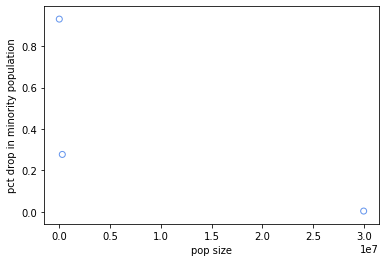

In [77]:
x = df_round[(df_round.round_alpha==0.20) & (df_round.round_beta==9.99) & (df_round.round_segregation==1.0)]['total_pop']
y = df_round[(df_round.round_alpha==0.20) & (df_round.round_beta==9.99) & (df_round.round_segregation==1.0)]['pct_change']

fig = plt.figure() 

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')

plt.xlabel('pop size')
plt.ylabel('pct drop in minority population')

plt.show()

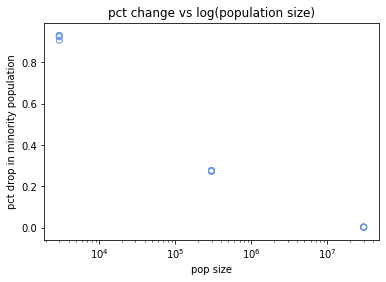

In [82]:
x = df_round[(df_round.round_alpha==0.20) & (df_round.round_beta==9.99)]['total_pop']
y = df_round[(df_round.round_alpha==0.20) & (df_round.round_beta==9.99)]['pct_change']

fig = plt.figure() 

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')
plt.xscale('log')

plt.xlabel('pop size')
plt.ylabel('pct drop in minority population')
plt.title('pct change vs log(population size)')

plt.show()

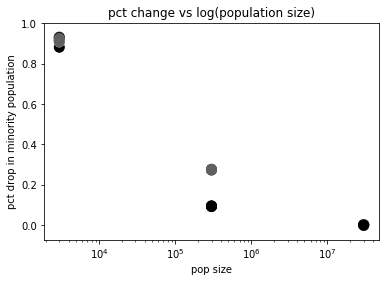

In [108]:
x = df_round['total_pop']
y = df_round['pct_change']
alphas = df_round['round_alpha']

fig = plt.figure() 

ax = fig.add_subplot(111)
ax.scatter(x, y, c=alphas, s=100)#, facecolors='none', edgecolors = 'cornflowerblue')
plt.xscale('log')

plt.xlabel('pop size')
plt.ylabel('pct drop in minority population')
plt.title('pct change vs log(population size)')

plt.show()

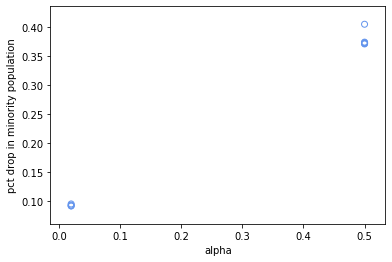

In [114]:
x = df_round[(df_round.total_pop==299700.0)]['round_alpha']
y = df_round[(df_round.total_pop==299700.0)]['pct_change']

fig = plt.figure() 

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')

plt.xlabel('alpha')
plt.ylabel('pct drop in minority population')

plt.show()

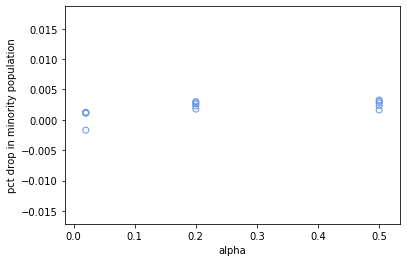

In [117]:
x = df_round[(df_round.total_pop>2997000.0)]['round_alpha']
y = df_round[(df_round.total_pop>2997000.0)]['pct_change']

fig = plt.figure() 

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')

plt.xlabel('alpha')
plt.ylabel('pct drop in minority population')

plt.show()

In [133]:
print(df_round[(df_round['pct_change']<0)])

     total_pop  round_alpha  round_beta  round_segregation  pct_change
16  29970000.0         0.02        9.99                0.2   -0.001697


In [135]:
print(df_round[(df_round['total_pop']>2997000)])

     total_pop  round_alpha  round_beta  round_segregation  pct_change
2   29970000.0         0.02        9.99                1.0    0.001236
4   29970000.0         0.20        9.99                0.6    0.002610
6   29970000.0         0.50        9.99                1.0    0.003250
9   29970000.0         0.20        9.99                1.0    0.003001
10  29970000.0         0.20        9.99                0.4    0.002255
12  29970000.0         0.50        9.99                0.4    0.002331
16  29970000.0         0.02        9.99                0.2   -0.001697
19  29970000.0         0.20        9.99                0.8    0.002797
21  29970000.0         0.50        9.99                0.2    0.001624
26  29970000.0         0.50        9.99                0.8    0.003035
37  29970000.0         0.20        9.99                0.2    0.001764
40  29970000.0         0.02        9.99                0.4    0.001106
41  29970000.0         0.50        9.99                0.6    0.002761
42  29

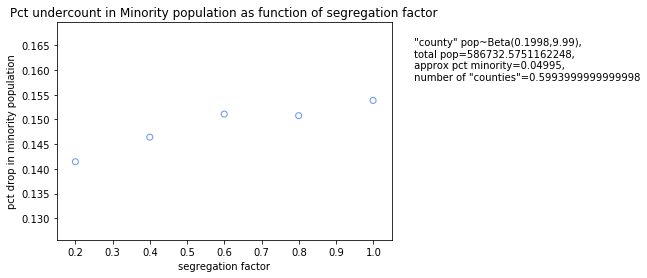

In [333]:
# plot as fn of segregation factor

x = data[:5]['segregation factor']
y = data[:5]['pct_change']
params = ' "county" pop~Beta({},{}),\n \
total pop={},\n \
approx pct minority={},\n \
number of "counties"={}'.format(data['alpha'][0],
                                data['beta'][0],
                                data['total pop count'][0],
                                data['prop minority'][0],
                                data['segregation factor'][0],
                                data['number of most detailed areas'][0])

fig = plt.figure() 

ax = fig.add_subplot(111)
ax.scatter(x, y, facecolors='none', edgecolors = 'cornflowerblue')

plt.xlabel('segregation factor')
plt.ylabel('pct drop in minority population')
# plt.title('Drop in Minority population as function of segregation factor')
plt.title('Pct undercount in Minority population as function of segregation factor')
plt.text(1.1,0.158,params)

plt.show()

In [ ]:
# you're going to want to plot pct_change as a function of prop minority, seg factor, and (a,b). 

In [20]:
metadata = pd.DataFrame(['precise','dp','non-neg','pct_change','number of most detailed areas',
        'alpha','beta','total pop count',
        'prop minority','segregation factor','seed'])
len(metadata)

11

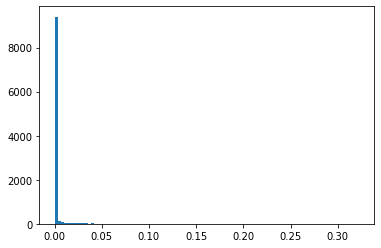

total pop: 20.03848060975213


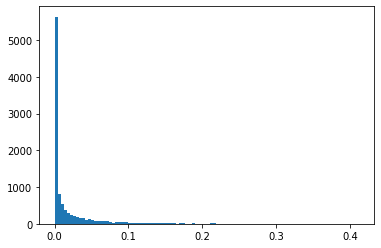

total pop: 191.61886041453386


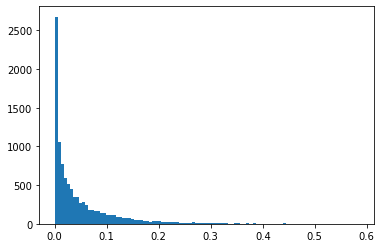

total pop: 466.566790721347


In [19]:
for [a,b] in [[.02,10],[.2,10],[.5,10]]:
    n_k = np.random.beta(a, b, 10_000)
    plt.hist(n_k, bins = 100)
    plt.show()
    print('total pop: ' + str(sum(n_k)))